# The Data

## Importing the necessary libraries for EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's start our analysis by checking the missing values in the dataset. For learning purposes let's use different techniques to detetect the missing values

### Printing the count of missing values 

In [6]:
print(
      train
      .isnull()
      .sum()
      )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Visualizing the missing values

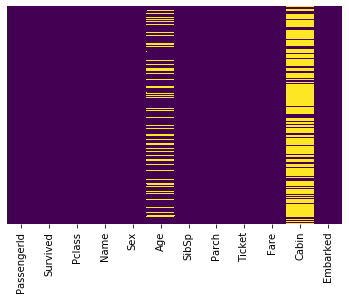

In [7]:
sns.heatmap(train.isnull(),
           yticklabels= False,
           cbar= False,
           cmap= 'viridis')

Age has some missing values, but it is still a reasonable amount of missing values that can be imputed. The Cabin however, has a lot of missing values, we can choose to drop it later or try to fill it if we need it 

### Visualizing the target variable

Let's now visuaize our target variable which is "Survived" 

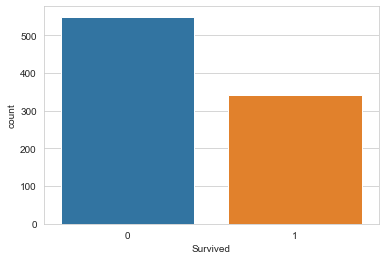

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', 
                data=train)

Let's take a detailed look into this column by adding the gender to it

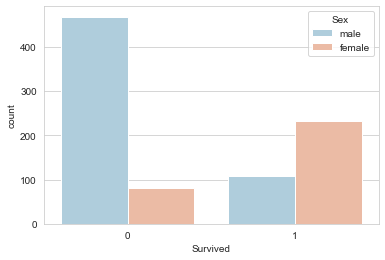

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',
              hue= 'Sex',
              data=train,
              palette= 'RdBu_r'
             )

We notice that most people who did not survive were men, maybe because when the accident happen, women were prioritized and saved first.
<br>
It is also interesting to see if the class of the passenger played a role in the survival or the death of those who were on the Titanic. Let's visualize that using a similar plot as the first one

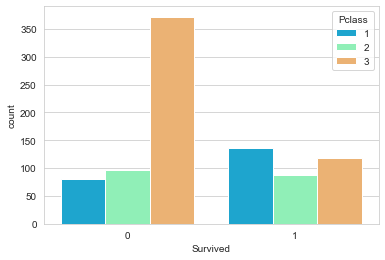

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',
              hue= 'Pclass',
              data=train,
              palette= 'rainbow'
             )

Unsurprisingly, it seems that higher classes had more survivors, most people who died belonged to the 3rd class which makes sense. We can also conclude that the class of the passenger is an important factor that impacts the survival of that said passenger

Let's go ahead now and visualize the data related to age since we will be imputing its missing values later, it's good to have an idea about the age range of the passengers

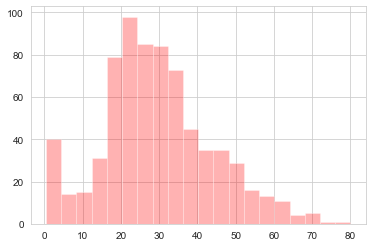

In [11]:
train['Age'].hist(bins= 'fd',
                  color='red',
                  alpha=0.3)

The age seem to have a normal distribution

Let us now take a look at the "SibSp" variable

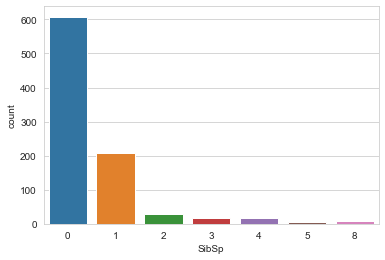

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',
              data=train,
             )

As we can see, about 70% of the passengers did not have siblings or spouse, about 23% had only 1, the remaining 7% of the paassengers had siblings or spouses that ranged from 2 to 8, we can later group these minorities into one category  

Now let's take a look at the fare for the passengers, we can visualize it using a histogram just like we did with the age

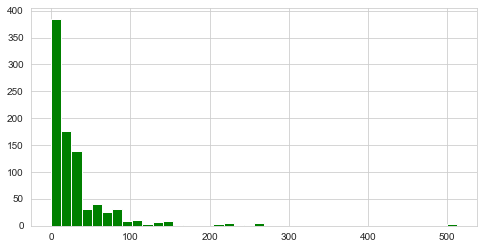

In [13]:
train['Fare'].hist(bins= 40,
                   color= 'green',
                   figsize= (8,4))

### Cleaning the data

As we saw before 'Age' and 'Cabin' features had considerable amount of missing values ('Embarked' had 2 missing values but that can be ignored )

### Cleaning the 'age' and 'Cabin' features

We can always fill in the missing values by just imputing them using the mean or median, but we can always try to be more accurate and imputing it based on other features such as gender, class etc...

Let's try to use boxplots to visualze the age based on other features, we'll start with the class

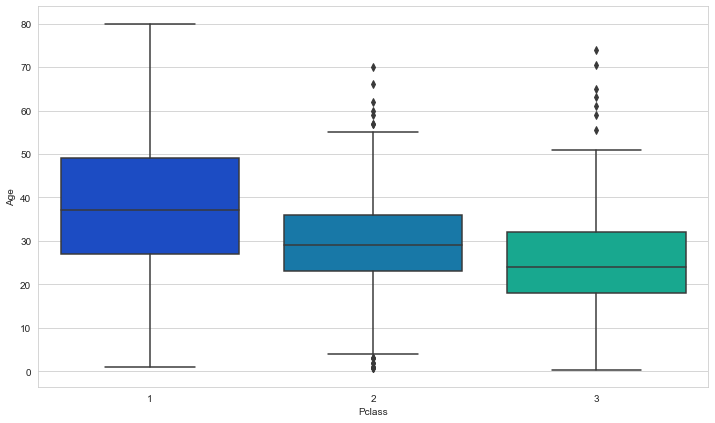

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', 
            y='Age', 
            data=train, 
            palette='winter',
           )

Let's create a function that imputes the age using the mean for each of the passenger classes

In [15]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Applying the function as follows

In [16]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age, axis=1)

Let's double check that the missing values were imputed

In [17]:
print(
      train
      .isnull()
      .sum()
      )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Great, Age does not contain any missing values, let's focus now on Cabin. it has so many missing values and we are not going to be able to impute them since it requires a lot of work. Let's just drop it for now

In [18]:
train.drop('Cabin', axis=1, inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


For the two missing values in Embarked, we will impute those using the mode

In [20]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [21]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
print(
      train
      .isnull()
      .sum()
      )

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Horrray, Our data does not have missing values now

### Transforming the categorical features into numerical ones

the most important categorical features that we have are the 'gender' and 'Embarked', the other features such as 'ticket' and 'name' are not important and will not impact our model so we will be dropping them, let's start by transforming the gender category

In [23]:
train.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
train.replace({'female': 0, 'male': 1}, 
              inplace= True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Now let's transform the 'Embarked' feature

In [27]:
train_encoded= pd.get_dummies(train)

In [28]:
train_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [29]:
train_encoded.drop(['Embarked_S'], axis=1, inplace=True)

In [30]:
train_encoded['FamSize'] = train_encoded['SibSp'] + train_encoded['Parch']

In [31]:
train_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,FamSize
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,1
2,3,1,3,0,26.0,0,0,7.9250,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,0


Let's create a new feature that tells us if the passenger was travelling alone or not

In [32]:
train_encoded['IsAlone']= 0

In [33]:
train_encoded.loc[train_encoded['FamSize'] == 0, 'IsAlone'] = 1


Creating a heatmap to visualize the correlation between the features

In [34]:
df_corr = train_encoded.corr().round(2)
print(df_corr)
df_corr.loc['Survived'].sort_values(ascending = False)


             PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch  Fare  \
PassengerId         1.00     -0.01   -0.04  0.04  0.04  -0.06  -0.00  0.01   
Survived           -0.01      1.00   -0.34 -0.54 -0.05  -0.04   0.08  0.26   
Pclass             -0.04     -0.34    1.00  0.13 -0.41   0.08   0.02 -0.55   
Sex                 0.04     -0.54    0.13  1.00  0.08  -0.11  -0.25 -0.18   
Age                 0.04     -0.05   -0.41  0.08  1.00  -0.24  -0.17  0.12   
SibSp              -0.06     -0.04    0.08 -0.11 -0.24   1.00   0.41  0.16   
Parch              -0.00      0.08    0.02 -0.25 -0.17   0.41   1.00  0.22   
Fare                0.01      0.26   -0.55 -0.18  0.12   0.16   0.22  1.00   
Embarked_C         -0.00      0.17   -0.24 -0.08  0.04  -0.06  -0.01  0.27   
Embarked_Q         -0.03      0.00    0.22 -0.07 -0.08  -0.03  -0.08 -0.12   
FamSize            -0.04      0.02    0.07 -0.20 -0.25   0.89   0.78  0.22   
IsAlone             0.06     -0.20    0.14  0.30  0.17  -0.58  -

Survived       1.00
Fare           0.26
Embarked_C     0.17
Parch          0.08
FamSize        0.02
Embarked_Q     0.00
PassengerId   -0.01
SibSp         -0.04
Age           -0.05
IsAlone       -0.20
Pclass        -0.34
Sex           -0.54
Name: Survived, dtype: float64

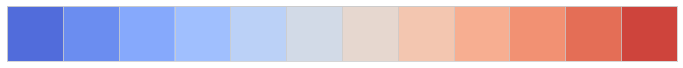

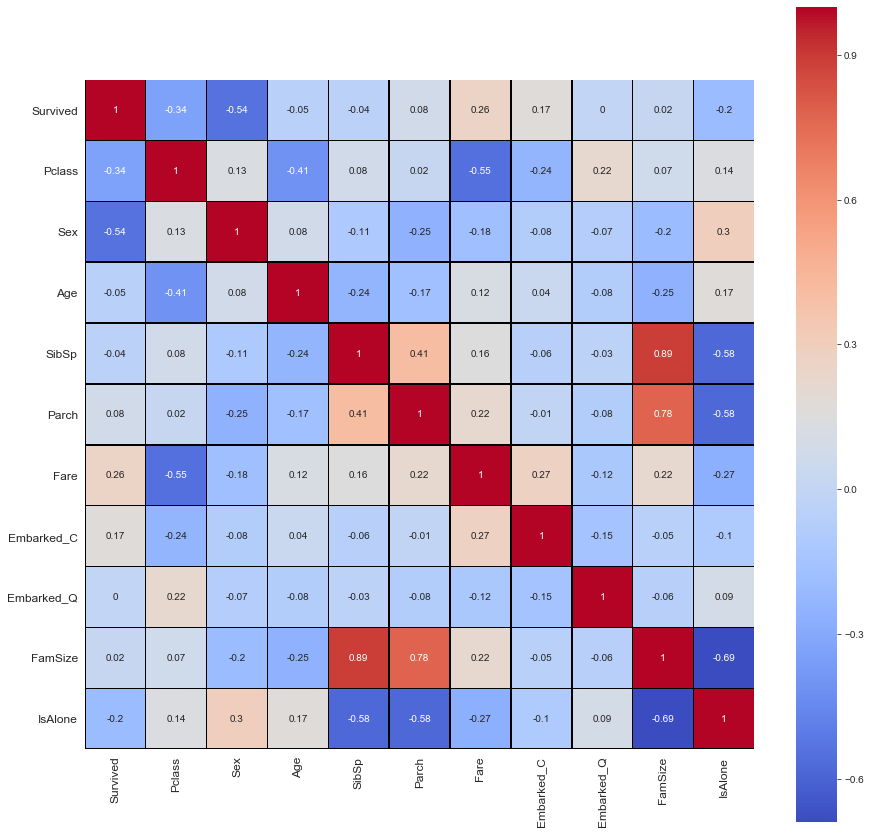

In [37]:
# Using palplot to view a color scheme
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[1:12, 1:12]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)

plt.savefig('Titanic Correlation Heatmap.png')
plt.show()

# Splitting the data

Let's first import our machine learning necessary libraries

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Let X be our feature and y our target variables

In [39]:
X = train_encoded.drop(['Survived'], axis=1)
y = train_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size = 0.2,
            random_state = 13,
            stratify = y)

### Building a random forest model

Let's build our intitial model that we're gonna use as a benchmark

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

### Model evaluation

Let's use AUC to evaluate our model

In [41]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print(rfc_cv_score.mean())

Confusion Matrix
[[86 24]
 [14 55]]


All AUC Scores
[0.78831169 0.86336898 0.69090909 0.90026738 0.92994652 0.85855615
 0.87967914 0.89973262 0.92834225 0.87619048]


Mean AUC Score
0.8615304303539597


### Hyperparameter tuning

First, we will create a parameters grid

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = pd.np.arange(1, 150, 15)
bootstrap = [True, False]
criterion_space = ['gini', 'entropy']
warm_start_space = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion_space,
               'warm_start' : warm_start_space}

Now that we created our parameter grid, we will conduct a random search to find the best parameters for our model
<br>
<br>
It is worth noting that number of iterations and cross-validation folds have a very high impact, a high number of iterations covers a wider range of combinations and cv folds help reduce overfitting but at the same time, increasing these parameters will result in a longer run time.

In [43]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 10, 
                                verbose=2, 
                                random_state=13, 
                                n_jobs = -1)

Let's fit our model now, this procedure will take some time, another hyperparams tuning method worth trying is GridSearchCV which could possibly find better hyperparams than RandomizedSearchCV. However, it will take a lot longer for this method to return the results. I chose RandomizedSearchCV since I am trying to solve the challenge within an hour 

In [44]:
rfc_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [47]:
print(rfc_random.best_params_)

{'warm_start': True, 'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'criterion': 'gini', 'bootstrap': True}


Let's try random forest with these parameters

In [48]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators = 2000, 
                             min_samples_split = 5, 
                             min_samples_leaf = 1, 
                             max_features = 'auto', 
                             criterion = 'gini', 
                             bootstrap = True)
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

#scoring the model
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

## Evaluating the new model

Let's take a look at the results of our model

In [49]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print(rfc_cv_score.mean())

Confusion Matrix
[[92 18]
 [15 54]]


All AUC Scores
[0.79116883 0.87860963 0.70962567 0.91122995 0.92780749 0.87058824
 0.88449198 0.89304813 0.92834225 0.88306878]


Mean AUC Score
0.8677980929745637


Now that we know where to look, let's use the information we gained from Randomizedsearch and incorporate it using GridSearchcv 

In [52]:
from sklearn.model_selection import GridSearchCV

Let's assign the grid parameters

In [53]:
param_grid = {
    'bootstrap': [True],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [3, 5, 8],
    'n_estimators': [100, 200, 300, 400, 600, 800, 1000, 2000],
    'criterion': ['gini', 'entropy']
}

In [54]:
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [55]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 379 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1027 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1999 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2606 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  7.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [56]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [57]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators = 1000, 
                             min_samples_split = 5, 
                             min_samples_leaf = 5, 
                             max_features = 3, 
                             criterion = 'entropy', 
                             bootstrap = True)
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

#scoring the model
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [58]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print(rfc_cv_score.mean())

Confusion Matrix
[[90 20]
 [16 53]]


All AUC Scores
[0.81662338 0.88128342 0.7315508  0.91657754 0.90588235 0.88235294
 0.87700535 0.88663102 0.93262032 0.88677249]


Mean AUC Score
0.8717299606711372
